**Задание 3: Эксперименты с регуляризацией (25 баллов)**\
**Создайте файл homework_regularization_experiments.py:**\
**3.1 Сравнение техник регуляризации (15 баллов)**

Без регуляризации\
Только Dropout (разные коэффициенты: 0.1, 0.3, 0.5)\
Только BatchNorm\
Dropout + BatchNorm

In [2]:
import torch
from datasets import get_mnist_loaders
from models import FullyConnectedModel
from trainer import train_model
from utils import plot_training_history

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_loader, test_loader = get_mnist_loaders(batch_size=64)

# Создал вручную конфиги
layer_configs = {
    "no_regularization": [
        {"type": "linear", "size": 128},
        {"type": "relu"},
        {"type": "linear", "size": 64},
        {"type": "relu"}
    ],
    "dropout_0.1": [
        {"type": "linear", "size": 128},
        {"type": "relu"},
        {"type": "dropout", "p": 0.1},
        {"type": "linear", "size": 64},
        {"type": "relu"},
        {"type": "dropout", "p": 0.1}
    ],
    "dropout_0.3": [
        {"type": "linear", "size": 128},
        {"type": "relu"},
        {"type": "dropout", "p": 0.3},
        {"type": "linear", "size": 64},
        {"type": "relu"},
        {"type": "dropout", "p": 0.3}
    ],
    "dropout_0.5": [
        {"type": "linear", "size": 128},
        {"type": "relu"},
        {"type": "dropout", "p": 0.5},
        {"type": "linear", "size": 64},
        {"type": "relu"},
        {"type": "dropout", "p": 0.5}
    ],
    "batchnorm_only": [
        {"type": "linear", "size": 128},
        {"type": "batchnorm"},
        {"type": "relu"},
        {"type": "linear", "size": 64},
        {"type": "batchnorm"},
        {"type": "relu"}
    ],
    "batchnorm_dropout": [
        {"type": "linear", "size": 128},
        {"type": "batchnorm"},
        {"type": "relu"},
        {"type": "dropout", "p": 0.3},
        {"type": "linear", "size": 64},
        {"type": "batchnorm"},
        {"type": "relu"},
        {"type": "dropout", "p": 0.3}
    ]
}

# Запуск обучения
for name, layers in layer_configs.items():
    print(f"Обучение модели: {name}")

    model = FullyConnectedModel(
        input_size=784,
        num_classes=10,
        layers=layers
    ).to(device)

    history = train_model(model, train_loader, test_loader, epochs=5, device=str(device))

Обучение модели: no_regularization


100%|██████████| 157/157 [00:02<00:00, 70.60it/s]


Epoch 1/5:
Train Loss: 0.2784, Train Acc: 0.9176
Test Loss: 0.1475, Test Acc: 0.9555
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 69.46it/s]


Epoch 2/5:
Train Loss: 0.1165, Train Acc: 0.9648
Test Loss: 0.1026, Test Acc: 0.9680
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 67.59it/s]


Epoch 3/5:
Train Loss: 0.0813, Train Acc: 0.9746
Test Loss: 0.0834, Test Acc: 0.9756
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 65.76it/s]


Epoch 4/5:
Train Loss: 0.0610, Train Acc: 0.9806
Test Loss: 0.0785, Test Acc: 0.9767
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 66.44it/s]


Epoch 5/5:
Train Loss: 0.0498, Train Acc: 0.9840
Test Loss: 0.0818, Test Acc: 0.9761
--------------------------------------------------
Обучение модели: dropout_0.1


100%|██████████| 157/157 [00:02<00:00, 63.36it/s]


Epoch 1/5:
Train Loss: 0.5714, Train Acc: 0.8257
Test Loss: 0.2041, Test Acc: 0.9388
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 63.12it/s]


Epoch 2/5:
Train Loss: 0.3288, Train Acc: 0.9064
Test Loss: 0.1753, Test Acc: 0.9480
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 63.57it/s]


Epoch 3/5:
Train Loss: 0.2884, Train Acc: 0.9195
Test Loss: 0.1444, Test Acc: 0.9578
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 65.14it/s]


Epoch 4/5:
Train Loss: 0.2556, Train Acc: 0.9280
Test Loss: 0.1314, Test Acc: 0.9624
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 64.16it/s]


Epoch 5/5:
Train Loss: 0.2402, Train Acc: 0.9324
Test Loss: 0.1196, Test Acc: 0.9648
--------------------------------------------------
Обучение модели: dropout_0.3


100%|██████████| 157/157 [00:02<00:00, 65.55it/s]


Epoch 1/5:
Train Loss: 0.5721, Train Acc: 0.8250
Test Loss: 0.1980, Test Acc: 0.9401
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 66.08it/s]


Epoch 2/5:
Train Loss: 0.3306, Train Acc: 0.9051
Test Loss: 0.1560, Test Acc: 0.9530
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 63.61it/s]


Epoch 3/5:
Train Loss: 0.2894, Train Acc: 0.9183
Test Loss: 0.1362, Test Acc: 0.9614
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 63.93it/s]


Epoch 4/5:
Train Loss: 0.2626, Train Acc: 0.9262
Test Loss: 0.1284, Test Acc: 0.9630
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 63.70it/s]


Epoch 5/5:
Train Loss: 0.2457, Train Acc: 0.9310
Test Loss: 0.1223, Test Acc: 0.9649
--------------------------------------------------
Обучение модели: dropout_0.5


100%|██████████| 157/157 [00:02<00:00, 63.16it/s]


Epoch 1/5:
Train Loss: 0.5722, Train Acc: 0.8266
Test Loss: 0.2003, Test Acc: 0.9409
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 64.68it/s]


Epoch 2/5:
Train Loss: 0.3265, Train Acc: 0.9095
Test Loss: 0.1547, Test Acc: 0.9539
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 64.08it/s]


Epoch 3/5:
Train Loss: 0.2770, Train Acc: 0.9229
Test Loss: 0.1386, Test Acc: 0.9588
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 63.93it/s]


Epoch 4/5:
Train Loss: 0.2564, Train Acc: 0.9292
Test Loss: 0.1218, Test Acc: 0.9658
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 64.37it/s]


Epoch 5/5:
Train Loss: 0.2328, Train Acc: 0.9342
Test Loss: 0.1154, Test Acc: 0.9641
--------------------------------------------------
Обучение модели: batchnorm_only


100%|██████████| 157/157 [00:02<00:00, 63.12it/s]


Epoch 1/5:
Train Loss: 0.2737, Train Acc: 0.9205
Test Loss: 0.1241, Test Acc: 0.9631
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 64.18it/s]


Epoch 2/5:
Train Loss: 0.1079, Train Acc: 0.9668
Test Loss: 0.0983, Test Acc: 0.9698
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 64.64it/s]


Epoch 3/5:
Train Loss: 0.0770, Train Acc: 0.9762
Test Loss: 0.0862, Test Acc: 0.9746
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 64.13it/s]


Epoch 4/5:
Train Loss: 0.0595, Train Acc: 0.9807
Test Loss: 0.0886, Test Acc: 0.9715
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 64.19it/s]


Epoch 5/5:
Train Loss: 0.0473, Train Acc: 0.9844
Test Loss: 0.0931, Test Acc: 0.9725
--------------------------------------------------
Обучение модели: batchnorm_dropout


100%|██████████| 157/157 [00:02<00:00, 63.96it/s]


Epoch 1/5:
Train Loss: 0.5773, Train Acc: 0.8226
Test Loss: 0.1959, Test Acc: 0.9399
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 64.11it/s]


Epoch 2/5:
Train Loss: 0.3280, Train Acc: 0.9073
Test Loss: 0.1606, Test Acc: 0.9533
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 64.25it/s]


Epoch 3/5:
Train Loss: 0.2788, Train Acc: 0.9200
Test Loss: 0.1363, Test Acc: 0.9598
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 67.25it/s]


Epoch 4/5:
Train Loss: 0.2514, Train Acc: 0.9293
Test Loss: 0.1268, Test Acc: 0.9621
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 66.03it/s]

Epoch 5/5:
Train Loss: 0.2386, Train Acc: 0.9328
Test Loss: 0.1219, Test Acc: 0.9640
--------------------------------------------------


L2 регуляризация (weight decay)

In [3]:
l2_layers = [
    {"type": "linear", "size": 256},
    {"type": "relu"},
    {"type": "linear", "size": 128},
    {"type": "relu"}
]

model = FullyConnectedModel(
    input_size=784,
    num_classes=10,
    layers=l2_layers
).to(device)

print("Обучение модели с L2 регуляризацией")

history = train_model(
    model,
    train_loader,
    test_loader,
    epochs=5,
    device=device,
    weight_decay=1e-4 
)


Обучение модели с L2 регуляризацией


100%|██████████| 157/157 [00:02<00:00, 66.78it/s]


Epoch 1/5:
Train Loss: 0.2265, Train Acc: 0.9317
Test Loss: 0.1032, Test Acc: 0.9663
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 67.09it/s]


Epoch 2/5:
Train Loss: 0.0941, Train Acc: 0.9706
Test Loss: 0.0776, Test Acc: 0.9749
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 67.92it/s]


Epoch 3/5:
Train Loss: 0.0672, Train Acc: 0.9794
Test Loss: 0.0707, Test Acc: 0.9780
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 68.12it/s]


Epoch 4/5:
Train Loss: 0.0528, Train Acc: 0.9834
Test Loss: 0.0710, Test Acc: 0.9776
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 67.84it/s]

Epoch 5/5:
Train Loss: 0.0456, Train Acc: 0.9853
Test Loss: 0.0774, Test Acc: 0.9767
--------------------------------------------------


**Визуализация весов**

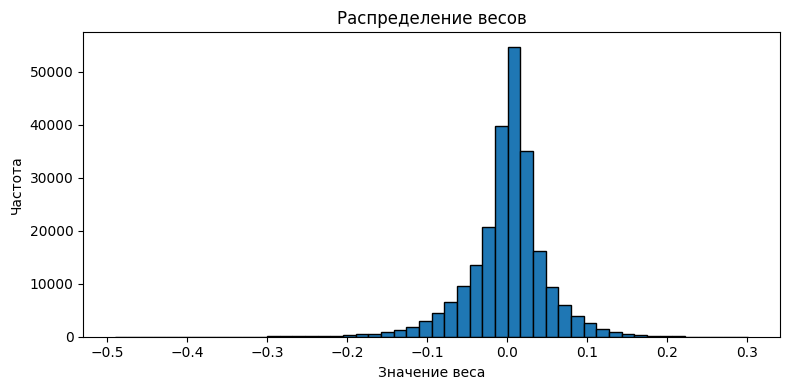

In [5]:
import matplotlib.pyplot as plt

weights = []
for layer in model.modules():
    if isinstance(layer, torch.nn.Linear):
        weights.extend(layer.weight.detach().cpu().numpy().flatten())
save_path="plots/weights_l2.png"
plt.figure(figsize=(8, 4))
plt.hist(weights, bins=50, edgecolor='black')
plt.title("Распределение весов")
plt.xlabel("Значение веса")
plt.ylabel("Частота")
plt.tight_layout()

plt.savefig(save_path)
plt.show()